In [729]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

In [730]:

width = 256
max_baseline = 4.0
nant = 4
center_position=[128,128]

its=100

ratio=[]

for p in range(its):

    sky = np.zeros(shape=(width, width), dtype=np.complex64)
    sky[width//2, width//2]=1

    ant_pos = []
    for i in range(nant):
        x = torch.rand(1).item() * max_baseline
        y = torch.rand(1).item() * max_baseline
        ant_pos.append([x, y])
    

    uvs = torch.zeros((width, width), dtype=torch.complex64)

    baselines = [
        [ant_pos[0][0] - ant_pos[1][0], ant_pos[0][1] - ant_pos[1][1]],
        [ant_pos[0][0] - ant_pos[2][0], ant_pos[0][1] - ant_pos[2][1]],
        [ant_pos[0][0] - ant_pos[3][0], ant_pos[0][1] - ant_pos[3][1]],
        [ant_pos[1][0] - ant_pos[0][0], ant_pos[1][1] - ant_pos[0][1]],
        [ant_pos[1][0] - ant_pos[2][0], ant_pos[1][1] - ant_pos[2][1]],
        [ant_pos[1][0] - ant_pos[3][0], ant_pos[1][1] - ant_pos[3][1]],
        [ant_pos[2][0] - ant_pos[0][0], ant_pos[2][1] - ant_pos[0][1]],
        [ant_pos[2][0] - ant_pos[1][0], ant_pos[2][1] - ant_pos[1][1]],
        [ant_pos[2][0] - ant_pos[3][0], ant_pos[2][1] - ant_pos[3][1]],
        [ant_pos[3][0] - ant_pos[0][0], ant_pos[3][1] - ant_pos[0][1]],
        [ant_pos[3][0] - ant_pos[1][0], ant_pos[3][1] - ant_pos[1][1]],
        [ant_pos[3][0] - ant_pos[2][0], ant_pos[3][1] - ant_pos[2][1]],
    ]

    u_indices = [
        int((baselines[0][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][0] + max_baseline) * width / (2 * max_baseline)),
    ]

    v_indices = [
        int((baselines[0][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][1] + max_baseline) * width / (2 * max_baseline)),
    ]


    uvs[u_indices,v_indices]=1

    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uvs)))

    radius = 2  # Radius of the circular mask

    # Create a circular mask
    mask = torch.zeros((width, width), dtype=torch.bool, )
    cy, cx = center_position
    y, x = torch.meshgrid(torch.arange(width), torch.arange(width))
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    masked_uv = sky_image * mask
    outofmask=sky_image-masked_uv

    nt_ratio=(torch.abs(torch.sum(torch.abs(outofmask))))/(torch.abs(torch.sum(torch.abs(masked_uv))))
    ratio.append(nt_ratio)
    
    
ratio;


In [731]:
v_indices 

[32, 118, 96, 223, 214, 192, 137, 41, 105, 159, 63, 150]

In [732]:
u_indices 

[62, 87, 76, 193, 153, 141, 168, 102, 116, 179, 114, 139]

In [733]:
ant_pos


[[1.6115479469299316, 0.682856559753418],
 [3.663208246231079, 3.6591410636901855],
 [2.873011827468872, 0.9673538208007812],
 [3.2312371730804443, 1.6549975872039795]]

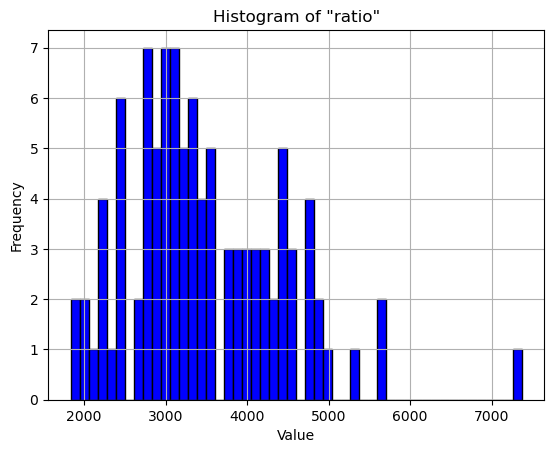

In [734]:
plt.hist(ratio, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of "ratio"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Init Coords
[0.56708884] [1.0871496]
[0.9756167] [0.00892186]
[0.32825422] [3.2349465]
[3.0621414] [0.4608462]


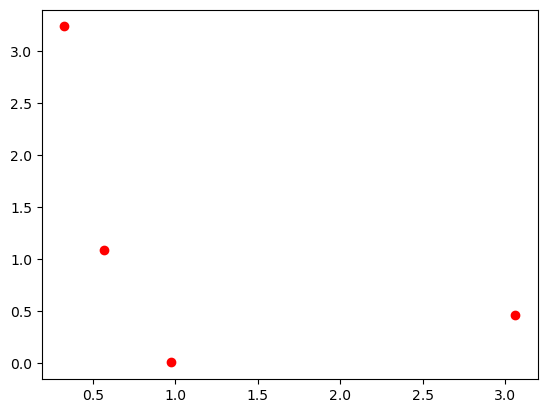

In [735]:
plt.plot(x0.detach().numpy(), y0.detach().numpy(), 'o', color='red',label="Initial Positions")
plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'o', color='red')
plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'o', color='red')
plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'o', color='red')

print("Init Coords")
print(x0.detach().numpy(),y0.detach().numpy())
print(x2.detach().numpy(),y2.detach().numpy())
print(x1.detach().numpy(),y1.detach().numpy())
print(x3.detach().numpy(),y3.detach().numpy())

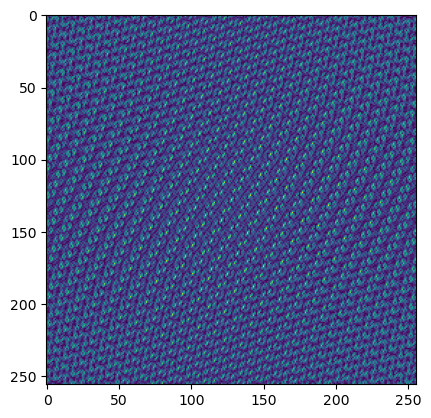

In [736]:
images = (np.abs(sky_image))
plt.imshow(images)
plt.show()

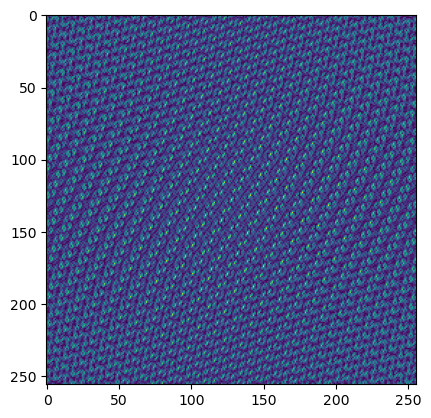

In [737]:
imagess = (np.abs(sky_image.detach().numpy()))
plt.imshow(imagess)
plt.show()

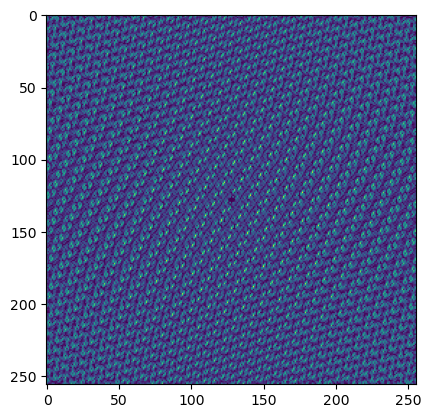

In [740]:
images = (np.abs(outofmask))
plt.imshow(images)
plt.show()